# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.title()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url + city)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        time.sleep(1)
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Adamstown
Processing Record 2 of Set 1 | Papatowai
Processing Record 3 of Set 1 | Mragowo
Processing Record 4 of Set 1 | Port-Aux-Francais
Processing Record 5 of Set 1 | Pampierstad
Processing Record 6 of Set 1 | Ryotsu-Minato
Processing Record 7 of Set 1 | Isafjordur
Processing Record 8 of Set 1 | Bayanhongor
Processing Record 9 of Set 1 | Freetown
Processing Record 10 of Set 1 | Blackmans Bay
Processing Record 11 of Set 1 | Waitangi
City not found. Skipping...
Processing Record 12 of Set 1 | Longyearbyen
Processing Record 13 of Set 1 | Margaret River
Processing Record 14 of Set 1 | Yellapur
Processing Record 15 of Set 1 | Gamba
Processing Record 16 of Set 1 | Taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | Magadan
Processing Record 18 of Set 1 | Thompson
Processing Record 19 of Set 1 | Talnakh
Processing Record 20 of Set 1 | Port Mathurin
Processing Record 21 of Set 1 | Tiks

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Adamstown,-25.0660,-130.1015,24.36,84,100,5.04,PN,1705909344
1,Papatowai,-46.5619,169.4708,15.37,94,94,1.74,NZ,1705909345
2,Mragowo,53.8644,21.3051,0.00,80,100,8.31,PL,1705909347
3,Port-Aux-Francais,-49.3500,70.2167,6.12,80,91,11.98,TF,1705909348
4,Pampierstad,-27.7832,24.6877,30.28,25,1,1.35,ZA,1705909350


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Adamstown,-25.0660,-130.1015,24.36,84,100,5.04,PN,1705909344
1,Papatowai,-46.5619,169.4708,15.37,94,94,1.74,NZ,1705909345
2,Mragowo,53.8644,21.3051,0.00,80,100,8.31,PL,1705909347
3,Port-Aux-Francais,-49.3500,70.2167,6.12,80,91,11.98,TF,1705909348
4,Pampierstad,-27.7832,24.6877,30.28,25,1,1.35,ZA,1705909350


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

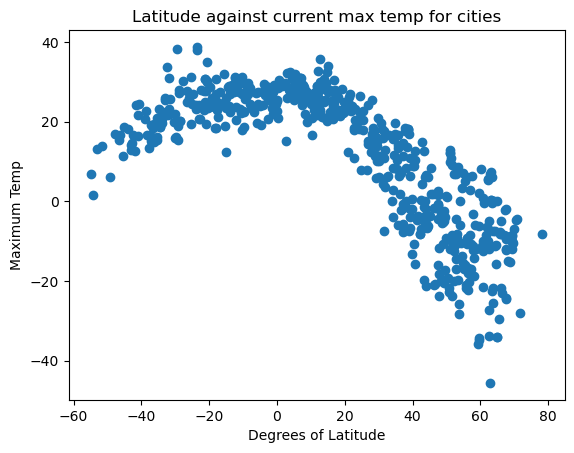

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Degrees of Latitude")
plt.ylabel("Maximum Temp")
plt.title("Latitude against current max temp for cities")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

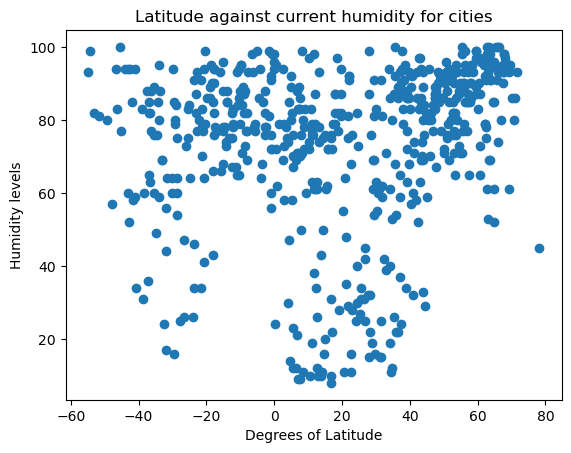

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Degrees of Latitude")
plt.ylabel("Humidity levels")
plt.title("Latitude against current humidity for cities")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

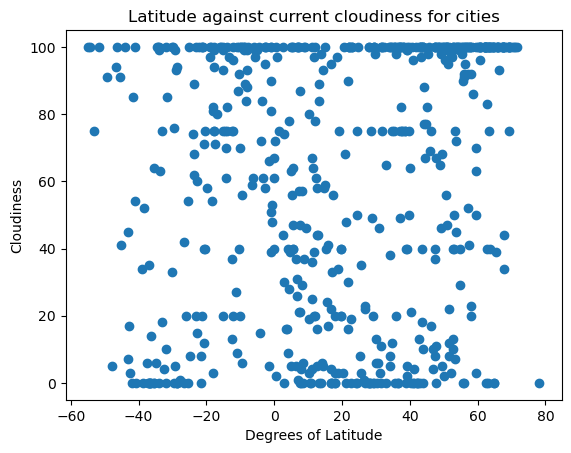

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Degrees of Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude against current cloudiness for cities")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

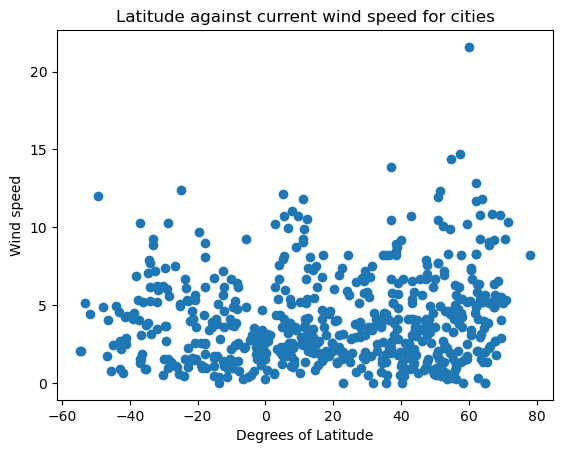

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Degrees of Latitude")
plt.ylabel("Wind speed")
plt.title("Latitude against current wind speed for cities")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Mragowo,53.8644,21.3051,0.00,80,100,8.31,PL,1705909347
5,Ryotsu-Minato,38.0833,138.4333,8.29,83,100,3.05,JP,1705909351
6,Isafjordur,66.0755,-23.1240,-4.98,74,100,5.14,IS,1705909353
7,Bayanhongor,46.7167,100.1167,-20.81,84,4,0.81,MN,1705909354
8,Freetown,8.4840,-13.2299,25.68,80,6,1.47,SL,1705909356


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Adamstown,-25.0660,-130.1015,24.36,84,100,5.04,PN,1705909344
1,Papatowai,-46.5619,169.4708,15.37,94,94,1.74,NZ,1705909345
3,Port-Aux-Francais,-49.3500,70.2167,6.12,80,91,11.98,TF,1705909348
4,Pampierstad,-27.7832,24.6877,30.28,25,1,1.35,ZA,1705909350
9,Blackmans Bay,-43.0167,147.3167,14.07,60,45,0.89,AU,1705909357


###  Temperature vs. Latitude Linear Regression Plot

The correlation is -0.86


Text(5, -40, 'y = -0.75x + 33.82')

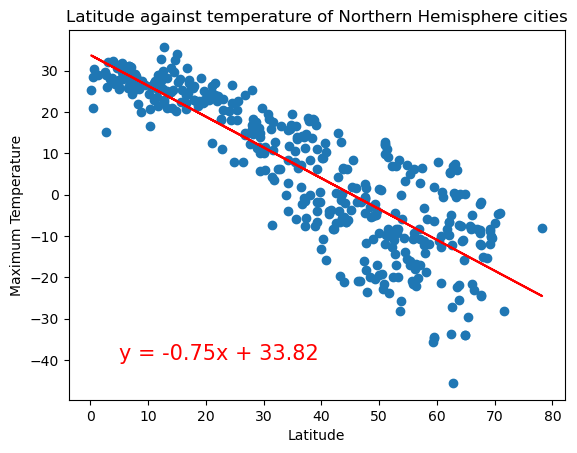

In [16]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
correlation, _ = st.pearsonr(x_values, y_values)
print(f"The correlation is {round(correlation,2)}")


plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude against temperature of Northern Hemisphere cities")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5, -40),fontsize=15,color="red")



The correlation is 0.58


Text(-30, 5, 'y = 0.24x + 28.67')

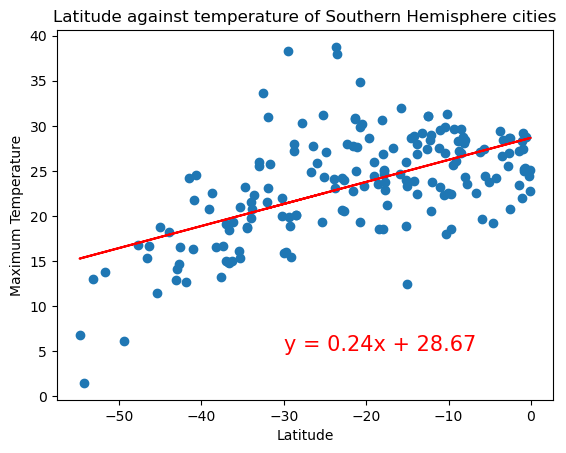

In [18]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
correlation, _ = st.pearsonr(x_values, y_values)
print(f"The correlation is {round(correlation,2)}")


plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude against temperature of Southern Hemisphere cities")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 5),fontsize=15,color="red")


**Discussion about the linear relationship:** The r values for these scatterplots indicate that there is a strong negative relationship between latitude and temperature in the northern hemisphere, but only a moderate relationship between the variables in the southern hemisphere

### Humidity vs. Latitude Linear Regression Plot

The correlation is 0.44


Text(40, 10, 'y = 0.54x + 52.05')

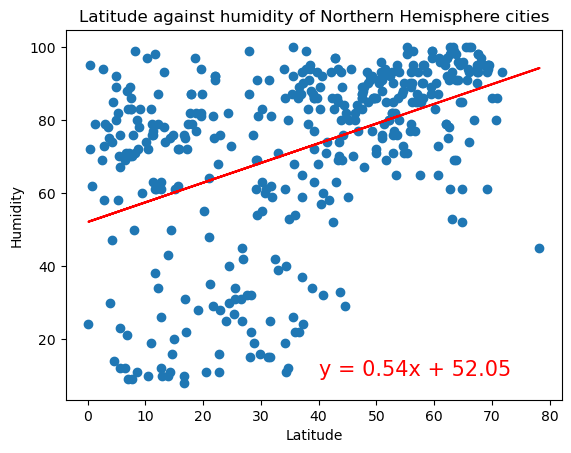

In [22]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
correlation, _ = st.pearsonr(x_values, y_values)
print(f"The correlation is {round(correlation,2)}")


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude against humidity of Northern Hemisphere cities")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 10),fontsize=15,color="red")

The correlation is 0.21


Text(-55, 20, 'y = 0.28x + 81.76')

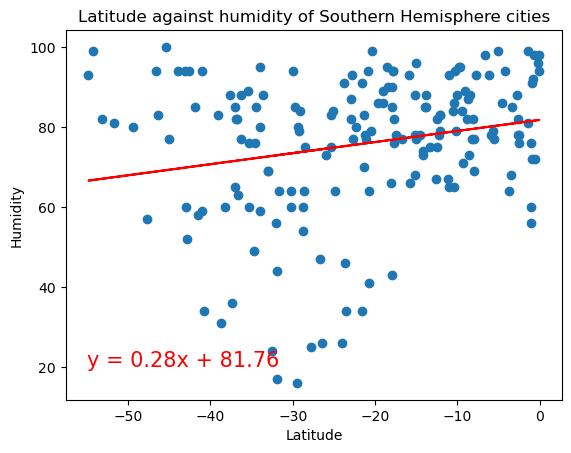

In [24]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
correlation, _ = st.pearsonr(x_values, y_values)
print(f"The correlation is {round(correlation,2)}")


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude against humidity of Southern Hemisphere cities")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 20),fontsize=15,color="red")

**Discussion about the linear relationship:** In this instance, it can be seen that the r-value for the northern hemipshere implies some level of correlation -- weak approaching medium -- however, there is no relation for the southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The correlation is 0.35


Text(60, 20, 'y = 0.69x + 34.98')

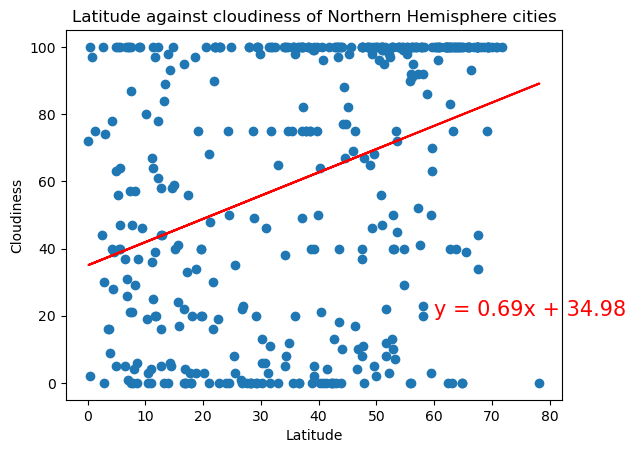

In [26]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
correlation, _ = st.pearsonr(x_values, y_values)
print(f"The correlation is {round(correlation,2)}")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude against cloudiness of Northern Hemisphere cities")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60, 20),fontsize=15,color="red")

The correlation is 0.28


Text(-55, 30, 'y = 0.76x + 76.97')

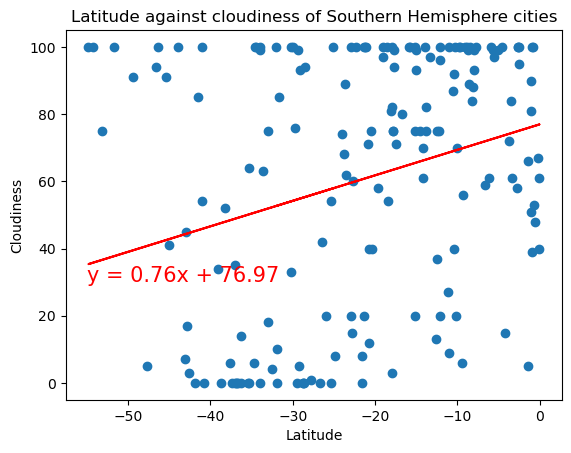

In [28]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
correlation, _ = st.pearsonr(x_values, y_values)
print(f"The correlation is {round(correlation,2)}")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude against cloudiness of Southern Hemisphere cities")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 30),fontsize=15,color="red")

**Discussion about the linear relationship:** R values from these scatterplots suggest that if there is any relationship between latitude and cloudiness, it is weak at best

### Wind Speed vs. Latitude Linear Regression Plot

The correlation is 0.11


Text(0, 20, 'y = 0.02x + 3.59')

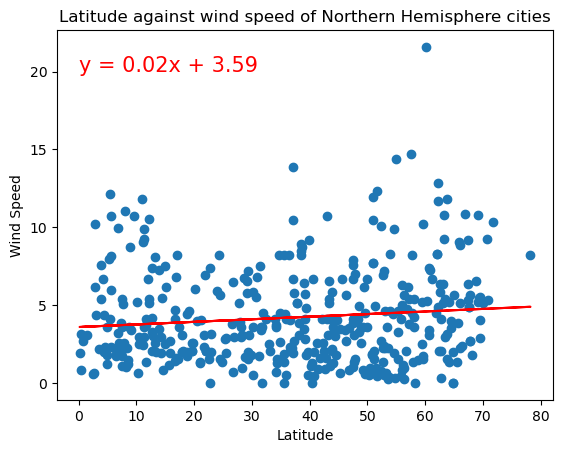

In [30]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
correlation, _ = st.pearsonr(x_values, y_values)
print(f"The correlation is {round(correlation,2)}")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude against wind speed of Northern Hemisphere cities")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 20),fontsize=15,color="red")

The correlation is -0.22


Text(-50, 12, 'y = -0.04x + 2.71')

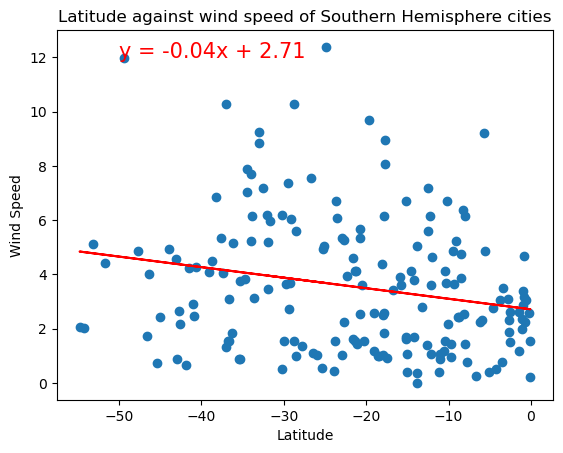

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
correlation, _ = st.pearsonr(x_values, y_values)
print(f"The correlation is {round(correlation,2)}")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude against wind speed of Southern Hemisphere cities")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 12),fontsize=15,color="red")

**Discussion about the linear relationship:** r values from both scatters suggest that there is little to no relationship between line of latitude and the wind speed

**Overall findings** From all the scatterplots, it can be concluded that, from this sample, that latitude has a higher effect on environmental conditions in the northern hemisphere compared to the southern, however, the only true impact that latitude possesses is on the overall max temperature. This, however, does not include extraneous variables, such as seasons, into consideration.